In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import zipfile

In [4]:
zip_file_path="/content/drive/MyDrive/archive (5).zip"

In [5]:
with zipfile.ZipFile(zip_file_path,"r") as zip_f:
    zip_f.extractall("/content/dataset1/")

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from glob import glob

In [7]:
image_path=glob("/content/dataset1/png_images/IMAGES/*.png")
mask_path=glob("/content/dataset1/png_masks/MASKS/*.png")

In [8]:
image_path.sort()

In [9]:
image_path

['/content/dataset1/png_images/IMAGES/img_0001.png',
 '/content/dataset1/png_images/IMAGES/img_0002.png',
 '/content/dataset1/png_images/IMAGES/img_0003.png',
 '/content/dataset1/png_images/IMAGES/img_0004.png',
 '/content/dataset1/png_images/IMAGES/img_0005.png',
 '/content/dataset1/png_images/IMAGES/img_0006.png',
 '/content/dataset1/png_images/IMAGES/img_0007.png',
 '/content/dataset1/png_images/IMAGES/img_0008.png',
 '/content/dataset1/png_images/IMAGES/img_0009.png',
 '/content/dataset1/png_images/IMAGES/img_0010.png',
 '/content/dataset1/png_images/IMAGES/img_0011.png',
 '/content/dataset1/png_images/IMAGES/img_0012.png',
 '/content/dataset1/png_images/IMAGES/img_0013.png',
 '/content/dataset1/png_images/IMAGES/img_0014.png',
 '/content/dataset1/png_images/IMAGES/img_0015.png',
 '/content/dataset1/png_images/IMAGES/img_0016.png',
 '/content/dataset1/png_images/IMAGES/img_0017.png',
 '/content/dataset1/png_images/IMAGES/img_0018.png',
 '/content/dataset1/png_images/IMAGES/img_0019

In [10]:
mask_path.sort()

In [11]:
w=[]
h=[]
for path in image_path:
   img=cv2.imread(path)
   w.append(img.shape[1])
   h.append(img.shape[0])

In [12]:
min(w)

550

In [13]:
min(h)

825

In [14]:
input_w=256
input_h=256
input_ch=3

In [15]:
images=np.zeros((len(image_path),input_w,input_h,input_ch),dtype=np.uint8)

In [16]:
for id_,path in enumerate(image_path):
  img=cv2.resize(cv2.imread(path),(input_w,input_h))
  images[id_]=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


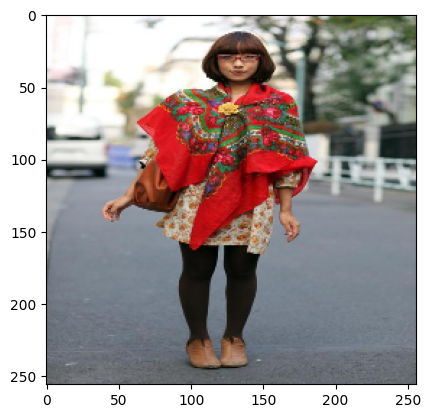

In [17]:
plt.imshow(images[120])
plt.show()

In [18]:
masks=np.zeros((len(mask_path),input_w,input_h),dtype=np.uint8)

In [19]:
for id_,path in enumerate(mask_path):
     masks[id_]=cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(input_w,input_h),interpolation=cv2.INTER_NEAREST)

In [20]:
images.shape

(1000, 256, 256, 3)

In [21]:
masks.shape

(1000, 256, 256)

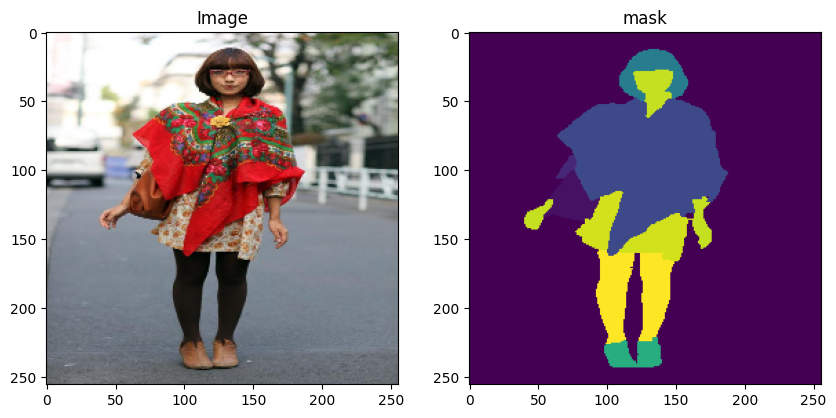

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(images[120])
axs[0].set_title('Image')
axs[1].imshow(masks[120])
axs[1].set_title('mask')
plt.show()

In [23]:
np.unique(masks,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54,
        55, 56, 57, 58], dtype=uint8),
 array([50325424,    57838,   589558,    47481,   407463,   573204,
           65377,    76825,      208,     6298,   180151,    53815,
         1646555,  1794863,       90,     3935,     2448,     7348,
          826064,    65060,     6321,    11315,   295607,   699465,
           64941,   100538,    13833,     4919,  1584541,     9793,
          276081,      271,   160551,    42687,   154378,   427534,
          547293,   145094,  1918738,   561651,    11048,    15538,
          163187,   479702,    40491,   386044,    81468,   292381,
            6821,    12344,   116765,   163642,     7983,     1601,
            1429]))

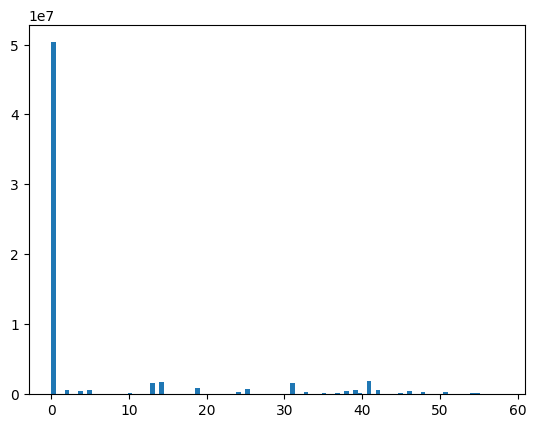

In [24]:
plt.hist(masks.reshape(-1),bins=100)
plt.show()

In [25]:
images=images/255

In [26]:
import tensorflow as tf
from keras.models  import Model
from keras.layers import Conv2D,MaxPool2D,Conv2DTranspose,Input,concatenate

In [27]:
input=Input(shape=(input_w,input_h,input_ch))
conv1_encoder=Conv2D(32,(3,3),activation="relu",padding="same",name="input_gray")(input)
conv1_encoder=Conv2D(32,(3,3),activation="relu",padding="same")(conv1_encoder)
pool1_encoder=MaxPool2D((2,2))(conv1_encoder)


conv2_encoder=Conv2D(64,(3,3),activation="relu",padding="same")(pool1_encoder)
conv2_encoder=Conv2D(64,(3,3),activation="relu",padding="same")(conv2_encoder)
pool2_encoder=MaxPool2D((2,2))(conv2_encoder)


conv3_encoder=Conv2D(128,(3,3),activation="relu",padding="same")(pool2_encoder)
conv3_encoder=Conv2D(128,(3,3),activation="relu",padding="same")(conv3_encoder)
pool3_encoder=MaxPool2D((2,2))(conv3_encoder)

conv4_encoder=Conv2D(256,(3,3),activation="relu",padding="same")(pool3_encoder)
conv4_encoder=Conv2D(256,(3,3),activation="relu",padding="same")(conv4_encoder)
pool4_encoder=MaxPool2D((2,2))(conv4_encoder)


conv5_encoder=Conv2D(512,(3,3),activation="relu",padding="same")(pool4_encoder)
conv5_encoder=Conv2D(512,(3,3),activation="relu",padding="same")(conv5_encoder)


up1_decoder=Conv2DTranspose(256,(2,2),strides=(2,2),padding="same")(conv5_encoder)

concat1=concatenate([conv4_encoder,up1_decoder])
conv1_decoder=Conv2D(256,(3,3),activation="relu",padding="same")(concat1)
conv1_decoder=Conv2D(256,(3,3),activation="relu",padding="same")(conv1_decoder)

up2_decoder=Conv2DTranspose(128,(2,2),strides=(2,2),padding="same")(conv1_decoder)

concat2=concatenate([conv3_encoder,up2_decoder])
conv2_decoder=Conv2D(128,(3,3),activation="relu",padding="same")(concat2)
conv2_decoder=Conv2D(128,(3,3),activation="relu",padding="same")(conv2_decoder)

up3_decoder=Conv2DTranspose(64,(2,2),strides=(2,2),padding="same")(conv2_decoder)
concat3=concatenate([conv2_encoder,up3_decoder])
conv3_decoder=Conv2D(64,(3,3),activation="relu",padding="same")(concat3)
conv3_decoder=Conv2D(64,(3,3),activation="relu",padding="same")(conv3_decoder)

up4_decoder=Conv2DTranspose(32,(2,2),strides=(2,2),padding="same")(conv3_decoder)
concat4=concatenate([conv1_encoder,up4_decoder])
conv4_decoder=Conv2D(32,(3,3),activation="relu",padding="same")(concat4)
conv4_decoder=Conv2D(32,(3,3),activation="relu",padding="same")(conv4_decoder)

output=Conv2D(59,(1,1),activation="softmax",name="output_Color")(conv4_decoder)
model=Model(inputs=[input],outputs=[output])


In [28]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_gray (Conv2D) │ (None, 256, 256,  │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      9,248 │ input_gray[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     36,928 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    147,584 │ conv2d_3[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │    295,168 │ max_pooling2d_2[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │    590,080 │ conv2d_5[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_6[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 16, 16,    │  1,180,160 │ max_pooling2d_3[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 16,    │  2,359,808 │ conv2d_7[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 32, 32,    │    524,544 │ conv2d_8[0][0]    │
│ (Conv2DTranspose)   │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 32, 32,    │          0 │ conv2d_6[0][0], 

 Total params: 7,762,011 (29.61 MB)

 Trainable params: 7,762,011 (29.61 MB)

 Non-trainable params: 0 (0.00 B)

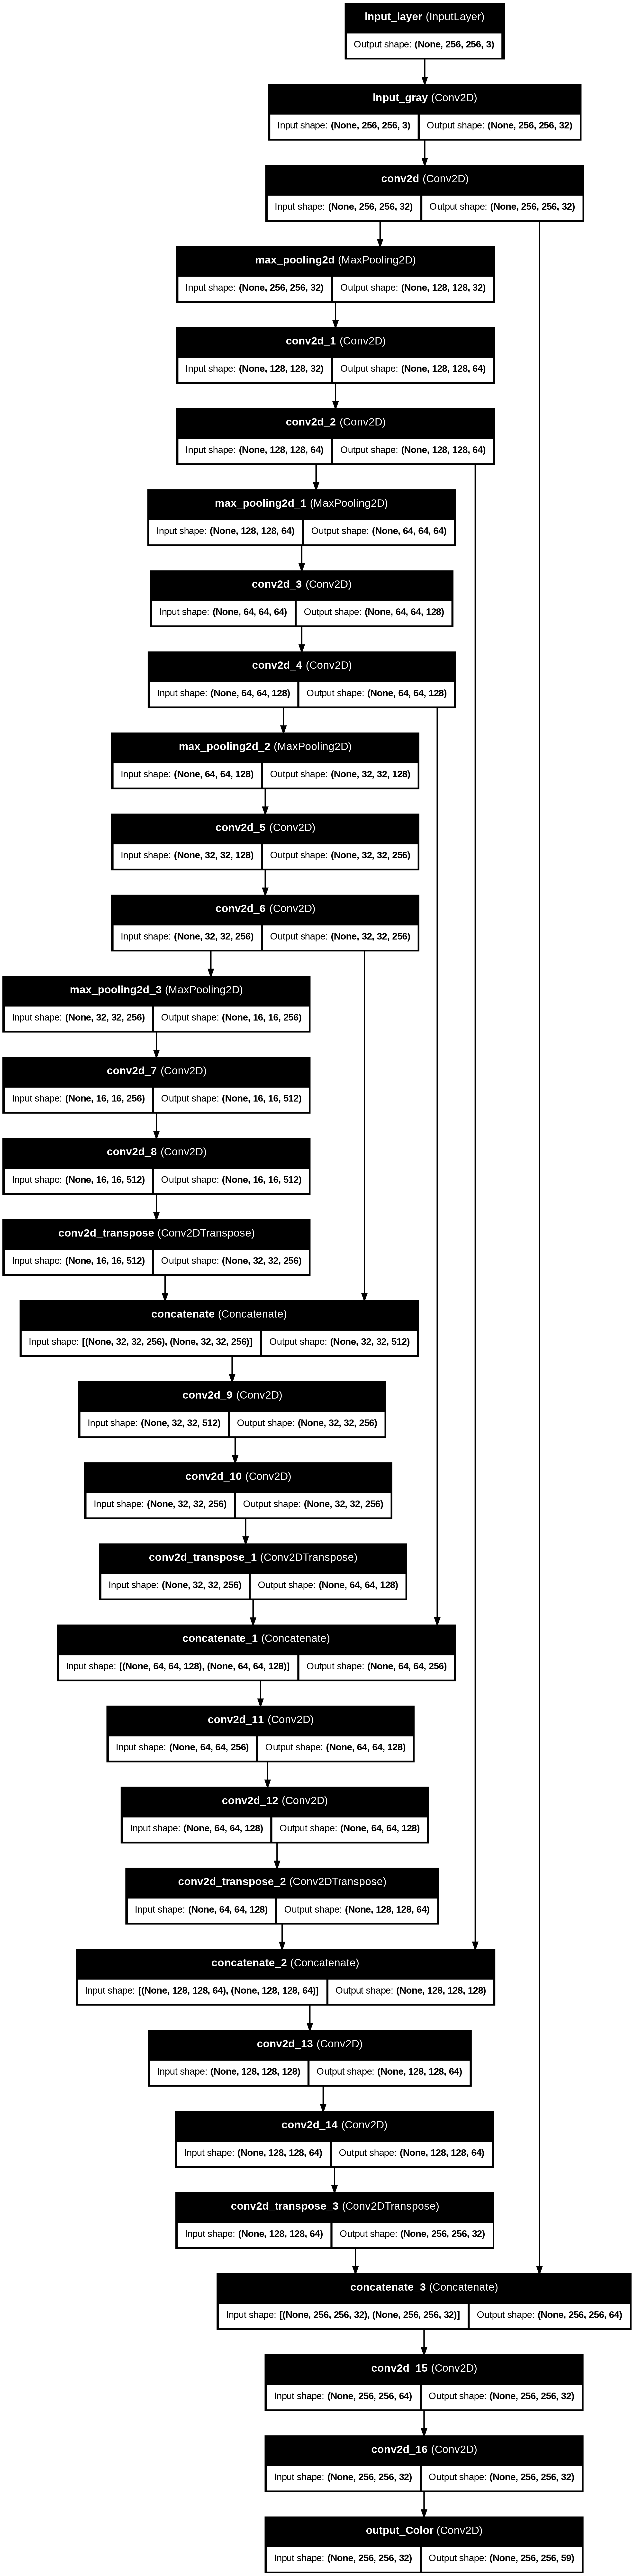

In [29]:
from tensorflow.keras.utils import plot_model
plot_model(
     model,
     to_file="model.png",
     show_shapes=True,
     show_layer_names=True,
     )

In [30]:
opt=tf.keras.optimizers.Adam(0.001)
loss=tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=opt,loss=loss)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
model.fit(images,masks, validation_split=0.1,batch_size=32,epochs=100,verbose=2 )

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 256, 256, 3))
  warnings.warn(msg)


29/29 - 109s - 4s/step - loss: 3.2268 - val_loss: 1.8472
Epoch 2/100
29/29 - 17s - 576ms/step - loss: 1.6325 - val_loss: 1.4798
Epoch 3/100
29/29 - 20s - 707ms/step - loss: 1.2745 - val_loss: 2.1708
Epoch 4/100
29/29 - 21s - 709ms/step - loss: 1.2401 - val_loss: 1.0766
Epoch 5/100
29/29 - 20s - 705ms/step - loss: 1.0075 - val_loss: 0.9941
Epoch 6/100
29/29 - 20s - 705ms/step - loss: 0.9469 - val_loss: 0.9209
Epoch 7/100
29/29 - 20s - 706ms/step - loss: 0.8907 - val_loss: 0.8785
Epoch 8/100
29/29 - 21s - 708ms/step - loss: 0.8482 - val_loss: 0.8424
Epoch 9/100
29/29 - 17s - 583ms/step - loss: 0.8066 - val_loss: 0.8648
Epoch 10/100
29/29 - 20s - 702ms/step - loss: 0.8026 - val_loss: 0.7836
Epoch 11/100
29/29 - 17s - 580ms/step - loss: 0.7534 - val_loss: 0.7547
Epoch 12/100
29/29 - 21s - 708ms/step - loss: 0.7301 - val_loss: 0.7369
Epoch 13/100
29/29 - 17s - 583ms/step - loss: 0.7182 - val_loss: 0.7224
Epoch 14/100
29/29 - 17s - 582ms/step - loss: 0.7004 - val_loss: 0.7028
Epoch 15/100
29

In [32]:
pred=model.predict(images[:5])

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(5, 256, 256, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [33]:
pred.shape

(5, 256, 256, 59)

In [34]:
pred_masks=np.argmax(pred,axis=-1)

In [35]:
test_arr=pred[4,1,1,:]

In [36]:
test_arr.shape

(59,)

In [37]:
pred_masks.shape

(5, 256, 256)

In [38]:
np.argmax(test_arr)

np.int64(0)

In [39]:
np.unique(pred_masks[2])

array([ 0,  2,  3,  5,  7, 13, 19, 25, 31, 33, 39, 41, 43, 47])

In [40]:
pred_masks[0].shape

(256, 256)

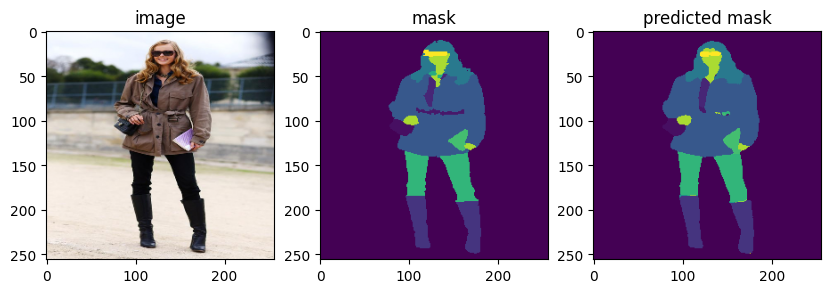

In [45]:
plt.figure(figsize=(10,6))
index=2
plt.subplot(1,3,1)
plt.imshow(images[index])
plt.title("image")

plt.subplot(1,3,2)
plt.imshow(masks[index])
plt.title("mask")

plt.subplot(1,3,3)
plt.imshow(pred_masks[index])
plt.title("predicted mask")
plt.show()




In [ ]:
label_path="/content/dataset1/labels.csv"

In [ ]:
labels=pd.read_csv(label_path)

In [ ]:
labels